# `Malignant Comment Classification`

### `Problem Statement`
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyber bullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

There has been a remarkable increase in the cases of cyber bullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.   

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as inoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyber bullying. 

### `Data Set Description`
The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.
The data set includes:
-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful.
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID:It includes unique Ids associated with each comment text given. 
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 

We need to build a model that can differentiate between comments and its categories. 



#### importing necessary libraries for as of now...


In [1]:
import warnings as war
war.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas_profiling
from scipy import interp
import scikitplot as skplt
import nltk
from nltk import FreqDist
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize, regexp_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import re
import os
import string
import joblib


### loading the Dataset:-

In [3]:
## loading the training dataset:-
train_df=pd.read_csv("Malignant_train_data.csv")
train_df.sample(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
12623,2179e83fd913848c,I've added a format parameter in the reference...,0,0,0,0,0,0
88309,ec39a8fb99270655,The template you used seems to have been eithe...,0,0,0,0,0,0
35425,5e9cabfdad2d2dff,"""\n\n Edits \n\nHello again. ) Thank you for ...",0,0,0,0,0,0
43920,75357de303962c9e,Okay there's an administrator set now if some...,0,0,0,0,0,0
64103,ab904996bfa9aad3,Unspecified source for Image:Billy_(album).png...,0,0,0,0,0,0
67110,b39031451f93a664,"""\n\n Khalifa Ezzat sourcing \n\nAHLM13, I too...",0,0,0,0,0,0
110742,50646929e5636a43,"Hi.\n\nThe story of C++ Builder, Delphi and RA...",0,0,0,0,0,0
21068,37976bca6f98e3cd,I would draw his to your attention: \n\nIP blo...,0,0,0,0,0,0
131892,c1c212bc9e50309a,"The gays of this school, and the club we made ...",1,0,0,0,0,0
83298,deddd0a76e0c54ac,quotes \n\nwhere did you get the quotes for Ni...,0,0,0,0,0,0


In [4]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

### About the Columns:
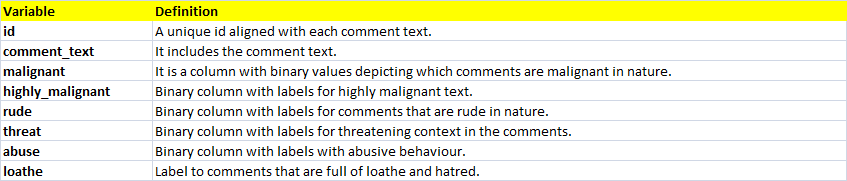




In [5]:
### loading the test dataset:-
test_df=pd.read_csv("Malignant_test_data.csv")
test_df.sample(10)

,id,comment_text
14703,18af280cf70a144b,:Done. Sorry for the delay.
125547,d1b58f19f0116e55,"Hi Cosmo0, we appreciate your efforts to clean..."
123119,cd8f2dd9dd0ec023,""" \n\n I always hate when I see users type thi..."
44337,49859fe0d5673a4e,== Kanae Yamamoto == \n\n A heads up: The link...
73618,7ab35e1dd7f29f5a,Well we shall see how effective they all are. ...
102904,abc3de62b601cc19,"""""""Speculation"""", for a sourced statement, app..."
104506,ae715a56fe0fdfe5,==== idiocey ==== \n\n i find it strange that ...
59287,629595c73af21cae,I would urge you to clean the article of this ...
91088,97dfa3d1bd669b8d,""" \n\n \n Please stop. If you continue to va..."
135652,e2b66d245b87745a,""" \n ::No, nightmare! lol! I am waiting in hop..."


In [6]:
## checking the shape:
print(f"The training dataset, we have {train_df.shape[0]} Rows and {train_df.shape[1]} columns present including target variable")
print(f"And also we have the training dataset, there are {train_df.shape[0]} Rows and {train_df.shape[1]} columns ")

The training dataset, we have 159571 Rows and 8 columns present including target variable
And also we have the training dataset, there are 159571 Rows and 8 columns 


# `EDA`

In [7]:
## checking info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


- We have a total of 8 columns, in which 2 columns are object datatype though the remaining 6 columns are of integer datatype.
- The id column, once again, does not appear to be of any use and may be eliminated.

In [8]:
### dropping the id columns first
train_df.drop("id",axis=1,inplace=True)
test_df.drop("id",axis=1,inplace=True)

In [9]:
## description
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
## chekcing skewness:
train_df.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

In [11]:
## checking nulls
train_df.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no missing values present in my dataset.

In [12]:
test_df.isna().sum()

comment_text    0
dtype: int64

In [13]:
## Checking the label
no_harm=round(train_df.malignant.value_counts(normalize=True)[0]*100,2)
harm=round(train_df.malignant.value_counts(normalize=True)[1]*100,2)

print("There are total", harm ,"percent of malignant comments.")
print("And also there are", no_harm , "precent of normal comments.")

There are total 9.58 percent of malignant comments.
And also there are 90.42 precent of normal comments.


Thus we can say that our dataset are imbalanced dataset. So we have to treat them according to the need, before the model building. 

#### let's check the first 10 comments.

In [14]:
for i in range(10):
    print(train_df.comment_text[i])
    print("\n")

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27


D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)


Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.


"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or

In [15]:
### creating a new column for counting the characters present  in the comments
train_df['char_count'] = train_df['comment_text'].apply(len)
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


### Visualization:

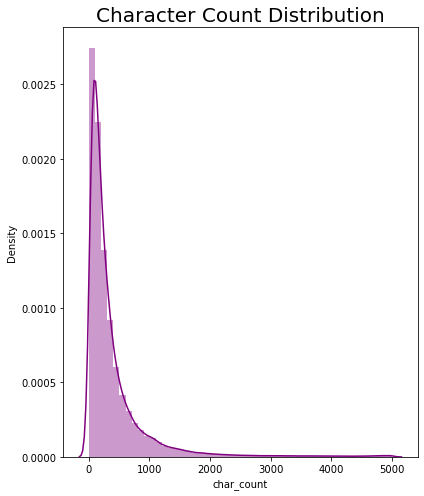

In [16]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(train_df['char_count'], kde=True,color='purple')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

- Maximum comments are in the range of 500 characters.
- Some comments are too long, there are upto 5000 alphabets present.

<AxesSubplot:xlabel='malignant', ylabel='count'>

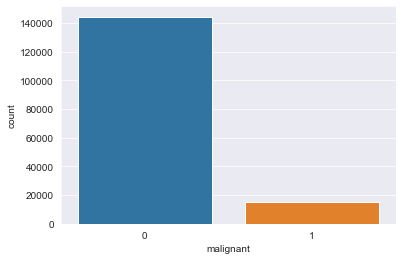

In [17]:
## visualize the label

sns.set_style("darkgrid")
sns.countplot(train_df['malignant'])


As we clearly see that our target variable is highly imbalanced.

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

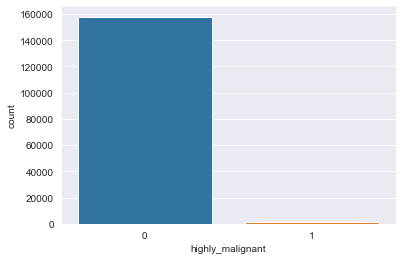

In [18]:
### highly malignant.

sns.set_style("darkgrid")
sns.countplot(train_df['highly_malignant'])

There are very less number of comments are highly malignant.

<AxesSubplot:xlabel='rude', ylabel='count'>

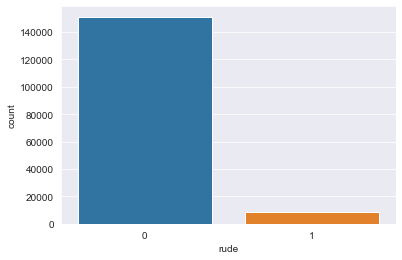

In [19]:
### Rude comments

sns.set_style("darkgrid")
sns.countplot(train_df['rude'])

- There are Very less number of rude comments present.
- But the number of rude comments in the dataset is little bit higher then highly malignant comments.

<AxesSubplot:xlabel='threat', ylabel='count'>

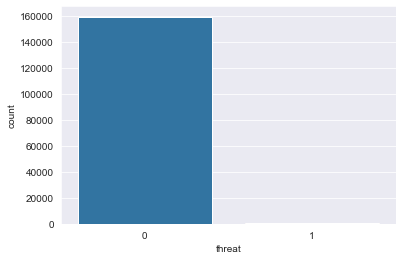

In [20]:
## Threat Comments.
sns.set_style("darkgrid")
sns.countplot(train_df['threat'])

- We can clearily see that the number of threat comments are negligible.

<AxesSubplot:xlabel='abuse', ylabel='count'>

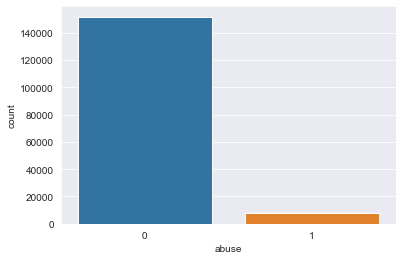

In [21]:
### Abuse comments.
sns.set_style("darkgrid")
sns.countplot(train_df['abuse'])

- There are little bit abusive comments But overall we can say that most of the comments are not abusive.

## Correlation:

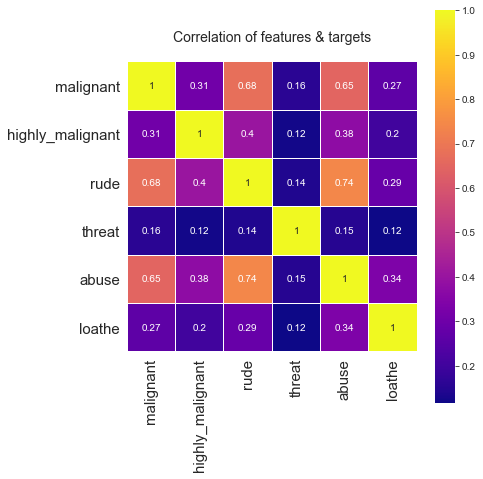

In [22]:
df=train_df[['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']]

colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

#### observation of the heatmap:-
- `Rude` & `Abuse` Feature are respectevely 68% and 65% able to tell us about the target variable.
- `Loathe` feature are very less correlated with our Target varibale.
- All features are positively correlated with target.
- `Rude` & `Abuse` Feature are also correlated with each other with 74% correlation, which is showing multi-collinearity problem here.


## `Cleaning the Comments:`

In [23]:
# Convert all the comments into lower case
train_df['comment_text'] = train_df['comment_text'].str.lower()
test_df['comment_text'] = test_df['comment_text'].str.lower()

In [24]:
### Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    train_df['comment_text'] = train_df['comment_text'].str.replace(i,'')

In [25]:
## for test dataset:
for i in charactors:
    test_df['comment_text'] = test_df['comment_text'].str.replace(i,'')

In [26]:
# Replace email addresses with 'email'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [27]:
# Replacing '\n' with ' '
train_df.comment_text = train_df.comment_text.str.replace('\n',' ')

In [28]:
### cleaning the unwanted text

def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    string = re.sub(r"what's", "what is ", string)
    string = re.sub(r"\'s", " ", string)
    string = re.sub(r"\'ve", " have ", string)
    string = re.sub(r"can't", "cannot ", string)
    string= re.sub(r"n't", " not ", string)
    string= re.sub(r"i'm", "i am ", string)
    string= re.sub(r"\'re", " are ", string)
    string= re.sub(r"\'d", " would ", string)
    string= re.sub(r"\'ll", " will ", string)
    string= re.sub(r"\'scuse", " excuse ",string)
    string= re.sub('\W', ' ', string)
    string= re.sub('\s+', ' ', string)
    string= string.strip(' ')
    ##removing all the urls:
    string = re.sub(r'http\S+', '', string) 
    return string

In [29]:
## cleaning the comments
pd.set_option('display.max_colwidth', -1)
train_df['comment_text'] = train_df['comment_text'].map(lambda comment : unwanted_text(comment))
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
0,explanation why the edits made under my username hardcore metallica fan were reverted they werent vandalisms just closure on some gas after i voted at new york dolls fac and please dont remove the template from the talk page since i amretired now892053827,0,0,0,0,0,0,264
1,daww he matches this background colour i amseemingly stuck with thanks talk 2151 january 11 2016 utc,0,0,0,0,0,0,112
2,hey man i amreally not trying to edit war its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page he seems to care more about the formatting than the actual info,0,0,0,0,0,0,233
3,more i cant make any real suggestions on improvement i wondered if the section statistics should be later on or a subsection of types of accidents i think the references may need tidying so that they are all in the exact same format ie date format etc i can do that later on if noone else does first if you have any preferences for formatting style on references or want to do it yourself please let me know there appears to be a backlog on articles for review so i guess there may be a delay until a reviewer turns up its listed in the relevant form eg wikipediagood_article_nominationstransport,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember what page thats on,0,0,0,0,0,0,67


- Now our dataset seems quite fine now.
- But it needs to be some more clean like we see that their are '-' character,numbers etc are present. we will either replace them or  delete them.

In [30]:
## cleaning the text data also:-
pd.set_option('display.max_colwidth', -1)
test_df['comment_text'] = test_df['comment_text'].map(lambda comment : unwanted_text(comment))
test_df.head()

,comment_text
0,you bitch ja rule is more succesful then youll ever be whats up with you and hating you sad mofuckasi should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me ja rule is about pride in da music man dont diss that shit on hi amand nothin is wrong bein like tupac he was a brother toofuckin white boys get things right next time
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the information i updated was the correct form i can only guess the source hadnt updated i shall update the information once again but thank you for your message
4,i dont anonymously edit articles at all


In [31]:
## checking the unique values:
train_df.apply(lambda x: len(x.unique()))

comment_text        158759
malignant           2     
highly_malignant    2     
rude                2     
threat              2     
abuse               2     
loathe              2     
char_count          4048  
dtype: int64

In [32]:
## Removing the digits or numbers from the comments:
train_df['comment_text'] = train_df['comment_text'].apply(lambda element: re.sub(r"\d+", "", element))

## for text dataset
test_df['comment_text'] = test_df['comment_text'].apply(lambda element: re.sub(r"\d+", "", element))

In [33]:
# Replacing '\n' with ' '
train_df.comment_text = train_df.comment_text.str.replace('\n',' ')
test_df.comment_text=test_df.comment_text.str.replace('\n',' ')

# Removing all the stopwords
stop_charactors = stopwords.words('english')
train_df.comment_text= train_df.comment_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))
test_df.comment_text= test_df.comment_text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))


In [34]:
## replacing space key
space_key=['\n','_','-']
for j in space_key:
    train_df['comment_text'] = train_df['comment_text'].str.replace(j,' ')

In [35]:
for j in space_key:
    test_df['comment_text'] = test_df['comment_text'].str.replace(j,' ')

In [36]:
### printing the top frequent words:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

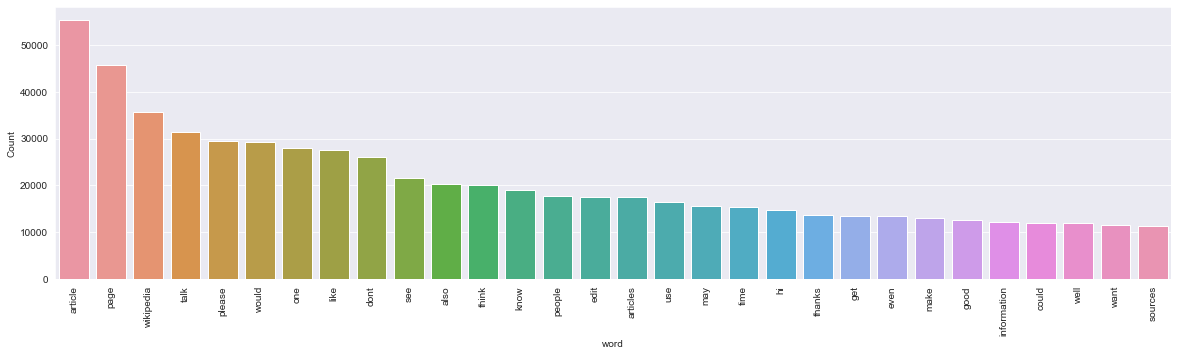

In [37]:
freq_words(train_df['comment_text'])

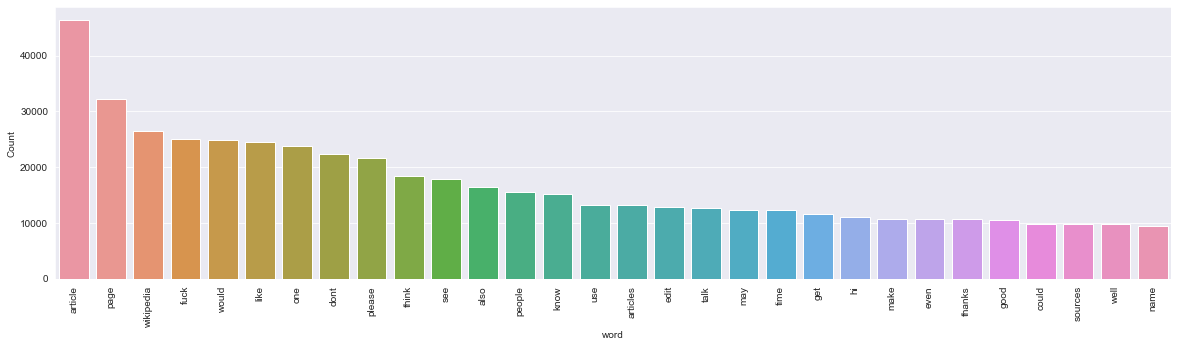

In [38]:
freq_words(test_df['comment_text'])

In [39]:
# Removing punctuations
train_df.comment_text = train_df.comment_text.str.replace("[^\w\d\s]","")
test_df.comment_text = test_df.comment_text.str.replace("[^\w\d\s]","")

In [40]:
# Stemming words
snb_stem = SnowballStemmer('english')
train_df.comment_text = train_df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))
test_df.comment_text = test_df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

In [41]:
pd.set_option('display.max_colwidth', -1)
train_df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count
74593,sir douchebag furthermor find simpli angri tampon boyfriend insert anus two night ago caus develop toxic shock syndrom constant pound anushol result loss brain cell trough rhythmic trauma,1,0,1,0,1,0,297
41476,death father shouldnt mention somewher articl,0,0,0,0,0,0,81
125639,whoop your right look close equival oper quantum harmon oscil mean eigenfunct hermit function eigenfunct fourier transform eigenvalu right scale factor havent look close enough check yes inde look like might give frft seem like nice way work like appear would surpris werent known sinc frft often defin precis look hermit function connect hermit function harmonicoscil eigenproblem well known howev would dig clear refer could put articl,0,0,0,0,0,0,800
9135,articl signifi corpor entiti intellig vehicl technolog project,0,0,0,0,0,0,76
90049,n thrust first vasimr engin model vx prove capabl newton lbf thrust would thing ever move graviti earth n obvious much higher wont even get ground,0,0,0,0,0,0,242
28250,spam like your tri deliber hurt,0,0,0,0,0,0,64
107160,boss gunotto king around,1,0,0,0,0,0,75
121416,cut bullshit person favor peopl serbian chapter noth articl deserv delet fact involv refer use prove exact happen montenegrin languag last year chose action make poor person choic noth regret section written bad english peopl tri help fix grammat error noth help one hegemon forc continu bloat articl montenegro one think cant say section base valid sourc use exampl show abus foundat posit support mani unjust caus obvious awar kind behavior repercuss one advic editor use word bullshit see one,1,0,1,0,0,0,989
96559,cardinaldanfuck faggot nigger cunt lick chink dipfuck shit nigger face get life delet shit wiki nerd faggot,1,1,1,0,1,1,142
85770,relook oh gosh actual complain yesterday insan copi entir user page instead section want modifi make inform realli sick person talk,0,0,0,0,0,0,274


In [42]:
### now  checking the cleared character count:-
train_df['char_count_after'] = train_df['comment_text'].apply(len)
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count,char_count_after
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,264,149
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,112,64
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,622,320
4,sir hero chanc rememb page that,0,0,0,0,0,0,67,31


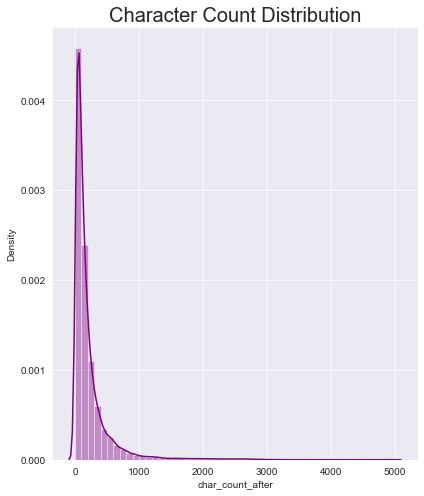

In [43]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(train_df['char_count_after'], kde=True,color='purple')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

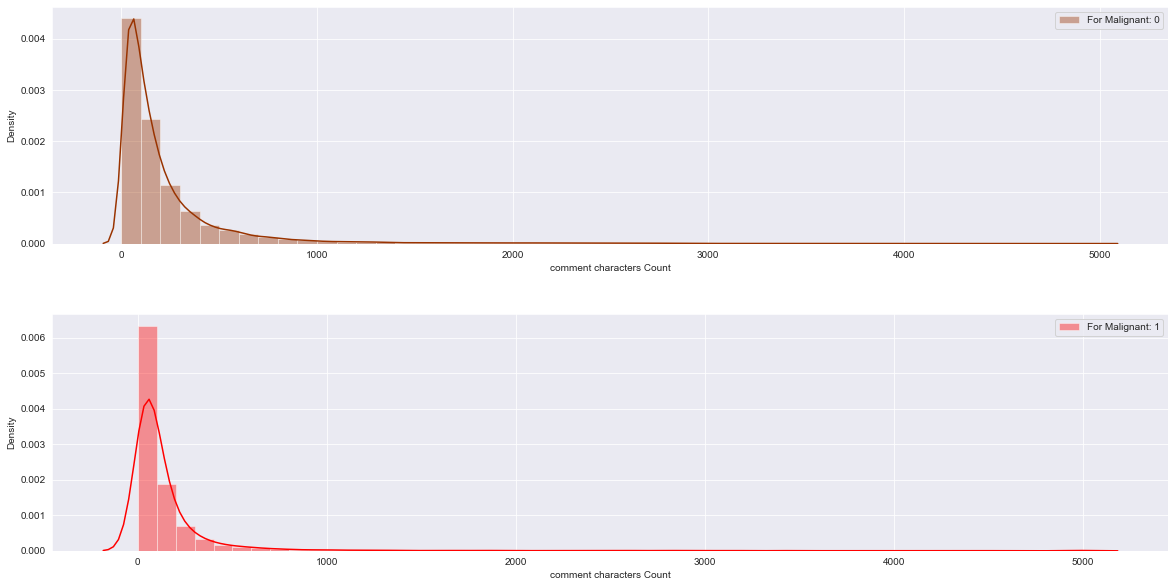

In [44]:
malignant = np.sort(train_df.malignant.unique())
cols = 1
rows = len(malignant)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1)]
for i in malignant:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(train_df.char_count_after[train_df.malignant==i], ax=axis, label=f"For Malignant: {i}", color=colors[i-1])
    axis.set_xlabel(f"comment characters Count")
    axis.legend()
    count += 1
    
plt.show()

### Handling Outliers using ZScore:

In [45]:
from scipy import stats
from scipy.stats import zscore

In [46]:
z_score=zscore(train_df[['char_count_after']])
abs_zscore=np.abs(z_score)

In [47]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=train_df[new_entry]
print("The shape before: ", train_df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (159571, 9)
The shape after:  (156135, 9)


#### Word Count:

In [48]:
# Creating column for word counts of the clean comment
df_new['Clean_word_count'] = df_new['comment_text'].apply(lambda x: len(str(x).split(' ')))
df_new.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,char_count,char_count_after,Clean_word_count
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,264,149,25
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,112,64,10
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,233,116,21
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,622,320,51
4,sir hero chanc rememb page that,0,0,0,0,0,0,67,31,6
5,congratul well use tool well talk,0,0,0,0,0,0,65,33,6
6,cocksuck piss around work,1,1,1,0,1,0,44,25,4
7,vandal matt shirvington articl revert pleas dont ban,0,0,0,0,0,0,115,52,8
8,sorri word nonsens offens anyway amnot intend write anyth articlewow would jump vandal ammer request encycloped one use school refer select breed page almost stub point anim breed short messi articl give info must someon around expertis eugen,0,0,0,0,0,0,472,242,38
9,align subject contrari dulithgow,0,0,0,0,0,0,70,32,4


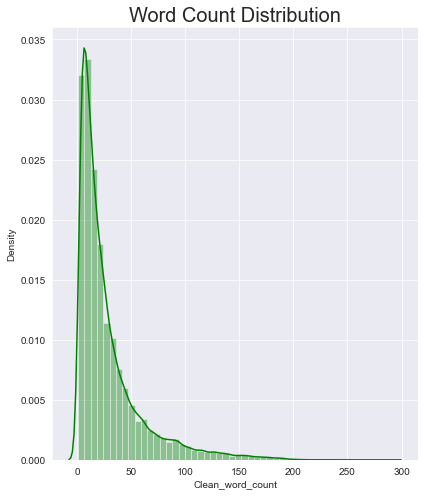

In [49]:
## visualization:
### Let's visulaize our word count first:
plt.figure(figsize=(6,7))
sns.distplot(df_new['Clean_word_count'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()

- After doing all the necessary pre-processing we find that the words in the comments having 0 to 50 words.
- Also some comments having more than 250 words. 

In [50]:
### checking NANs in the comments again:
df_new.isna().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
char_count          0
char_count_after    0
Clean_word_count    0
dtype: int64

There are no missing value so we are  good to go...!!

## `Creating Word Cloud:`

Checking  the loud toxic words by Word Clud:

****************Malignant******************



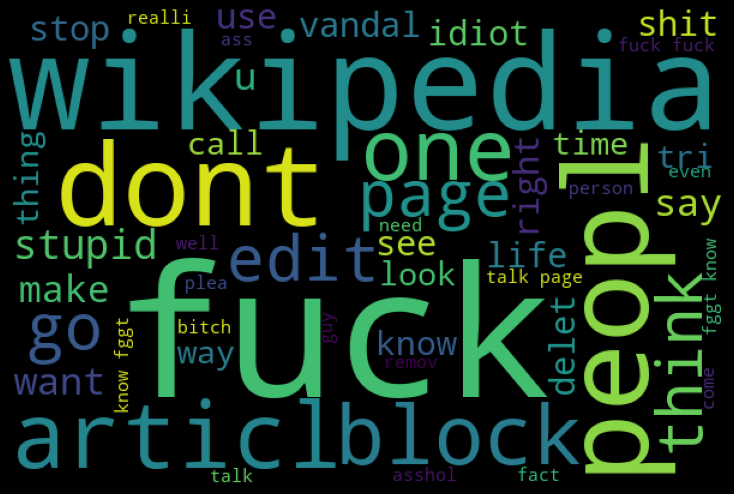

In [51]:
### malignant
print("****************Malignant******************\n")
harms = df_new['comment_text'][df_new['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

****************Highly_Malignant******************



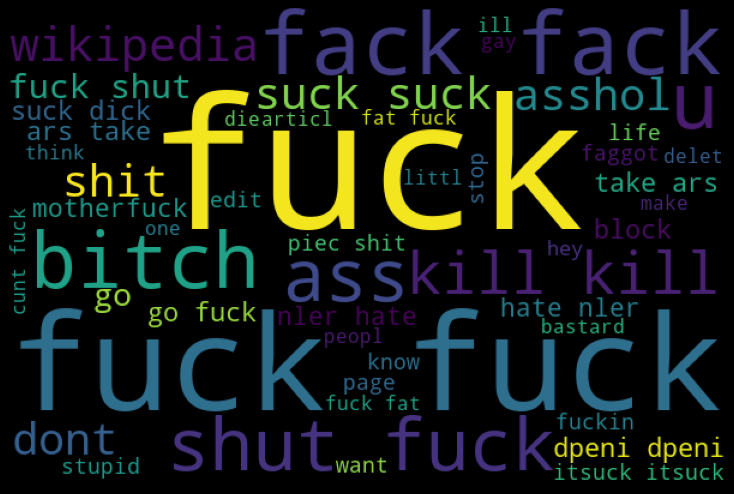

In [52]:
### Highly malignant
print("****************Highly_Malignant******************\n")
harms = df_new['comment_text'][df_new['highly_malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

****************Abuse******************



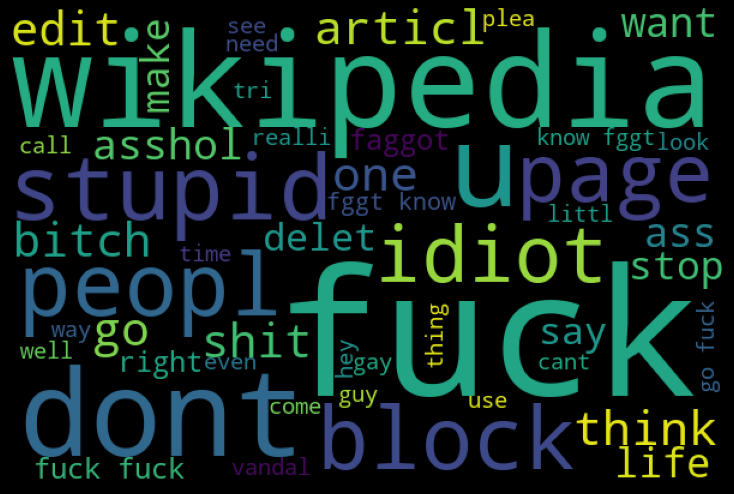

In [53]:
### Abuse
print("****************Abuse******************\n")
harms = df_new['comment_text'][df_new['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

****************Rude******************



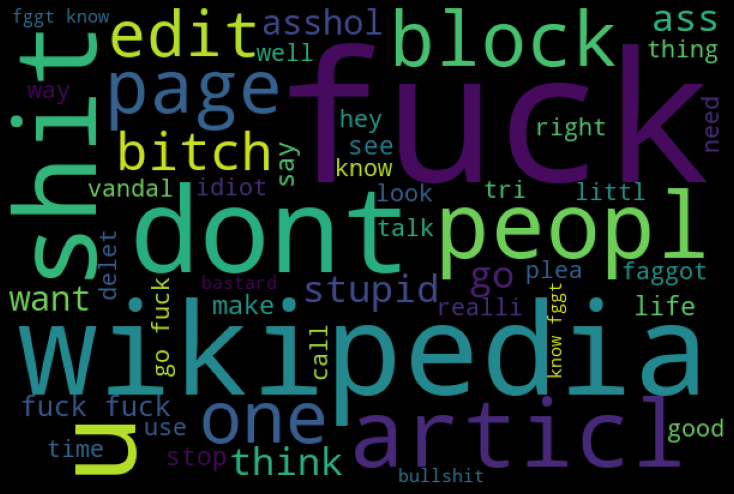

In [54]:
### Rude
print("****************Rude******************\n")
harms = df_new['comment_text'][df_new['rude']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

****************Threat******************



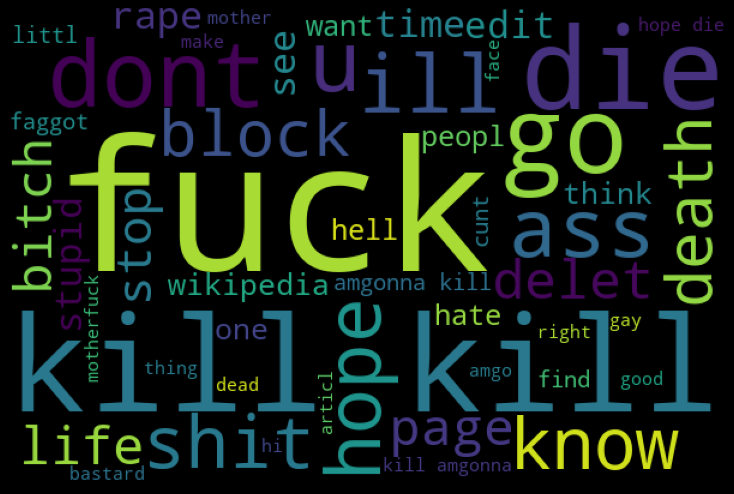

In [55]:
### Threat
print("****************Threat******************\n")
harms = df_new['comment_text'][df_new['threat']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

****************Loathe******************



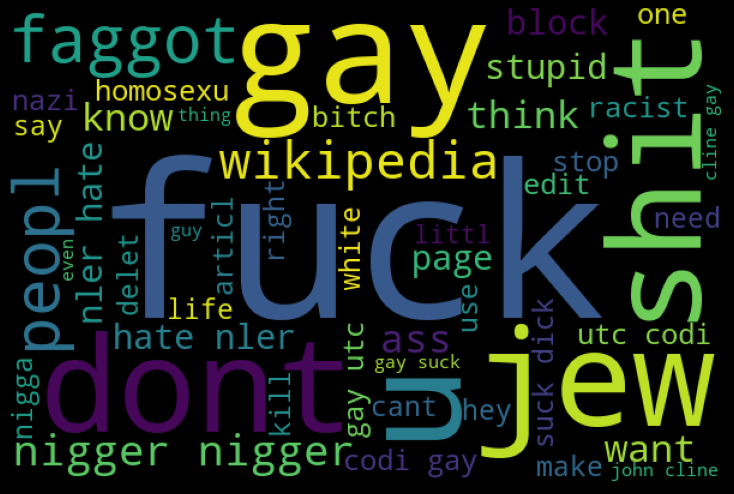

In [56]:
### Loathe
print("****************Loathe******************\n")
harms = df_new['comment_text'][df_new['loathe']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(harms))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observation of Word Cloud:

- we can see in wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- we can see in  wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- also we can see in wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- we can see in  wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- we can see in  wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- and at the last we can see in  wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

## `Correlation Bar Chart:`

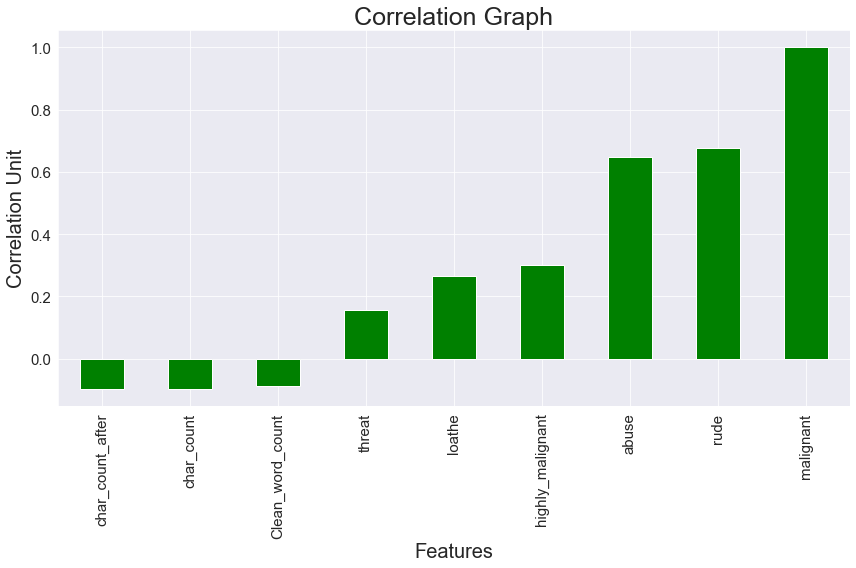

In [57]:
#correlation
plt.figure(figsize = (12, 8))
df_new.corr()['malignant'].sort_values(ascending = True).plot(kind = 'bar', color = 'green')
plt.xlabel('Features', fontsize = 20)
plt.xticks(fontsize=15)
plt.ylabel('Correlation Unit', fontsize = 20)
plt.yticks(fontsize=15)
plt.title('Correlation Graph', fontsize = 25)
plt.tight_layout()

### observations:
- As we assume that abuse and rude are highly correlated with target variable.
- All the character and word count is negatively correlated with the target variable.

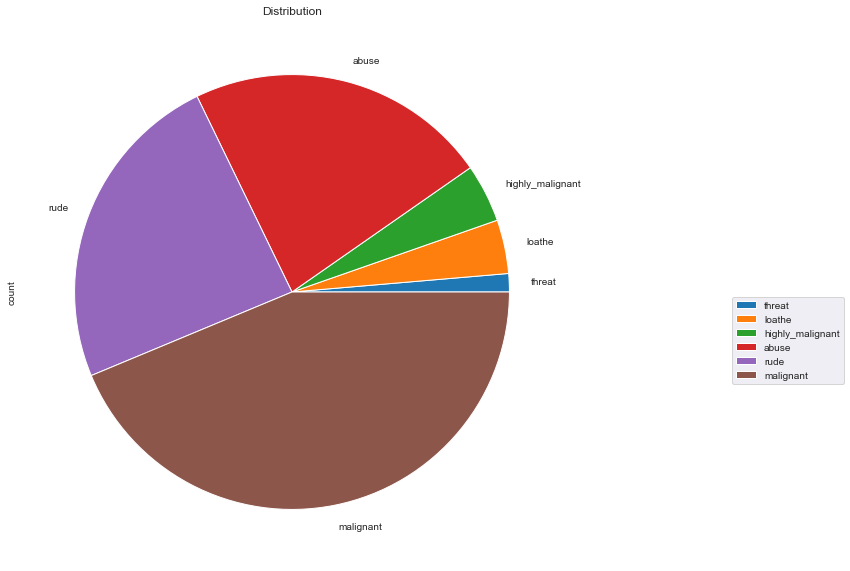

In [58]:
## Visualize the distribution:

dfx = df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
dfx.plot.pie(y='count',title='Distribution',figsize=(10,10)).legend(loc='upper left', bbox_to_anchor=(1.3, 0.5))

## `Pre-Processing for Model Building:`

As we already see that we observe that there are 156135 rows and only 6 columns in this final dataframe. This leads us to believe that we'll need to add more columns or delete some columns to our spreadsheet to categorise the comments based on our model's confidence.

Now what we'll do add all the columns, it means that ['malignant','highly_malignant','rude','threat','abuse','loathe'] columns will be added. If any comment falls in any category of them then we will assume that that is the 'Bad Comment'.

In [59]:
## target_features = df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']]
df_new['Target'] =df_new[['malignant','highly_malignant','rude','threat','abuse','loathe']].sum(axis =1)

### we created char_count, clean_char_count and Clean_word count feature only for visualization purpose. 
##So they are not contribute anything in model building so we will drop them now.
df_new.drop(columns=['char_count','char_count_after','Clean_word_count'],axis=1,inplace=True)
df_new.head(20)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Target
0,explan edit made usernam hardcor metallica fan revert werent vandal closur gas vote new york doll fac pleas dont remov templat talk page sinc amretir,0,0,0,0,0,0,0
1,daww match background colour amseem stuck thank talk januari utc,0,0,0,0,0,0,0
2,hey man amreal tri edit war guy constant remov relev inform talk edit instead talk page seem care format actual info,0,0,0,0,0,0,0
3,cant make real suggest improv wonder section statist later subsect type accid think refer may need tidi exact format ie date format etc later noon els first prefer format style refer want pleas let know appear backlog articl review guess may delay review turn list relev form eg wikipediagood articl nominationstransport,0,0,0,0,0,0,0
4,sir hero chanc rememb page that,0,0,0,0,0,0,0
5,congratul well use tool well talk,0,0,0,0,0,0,0
6,cocksuck piss around work,1,1,1,0,1,0,4
7,vandal matt shirvington articl revert pleas dont ban,0,0,0,0,0,0,0
8,sorri word nonsens offens anyway amnot intend write anyth articlewow would jump vandal ammer request encycloped one use school refer select breed page almost stub point anim breed short messi articl give info must someon around expertis eugen,0,0,0,0,0,0,0
9,align subject contrari dulithgow,0,0,0,0,0,0,0


In [60]:
df_new.Target.value_counts()

0    140240
1    6240  
3    4148  
2    3432  
4    1677  
5    368   
6    30    
Name: Target, dtype: int64

In [61]:
## Anything is greater than 0, we will assume that this is a harmful comment.
## adding all of them which are greater then 0
for i in df_new.Target:
    if i in [2,3,4,5,6]:
        df_new.Target=df_new.Target.replace(i,1)


In [62]:
df_new.Target.value_counts()

0    140240
1    15895 
Name: Target, dtype: int64

We have created Target column and separate all the harful comments and non toxic comments. But we can see that our dataset is seems that our dataset is imbalanced, which leads to our model to biased. So we have to handle it by some over sampling tools.

### Vectorization:

In [63]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features = 3000, stop_words='english')
features = tf_vector.fit_transform(df_new['comment_text'])
features.shape

(156135, 3000)

In [64]:
x=features
y=df_new.Target
print(x.shape)
print(y.shape)

(156135, 3000)
(156135,)


## `Model Building:`

In [65]:
## importing smote for imbalanced dataset:

from imblearn.over_sampling import SMOTE


In [66]:
### importing train test 
from sklearn.model_selection import train_test_split

### importing the models
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
rf=RandomForestClassifier()
adc=AdaBoostClassifier()
gbdt=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
from sklearn.svm import SVC
svc=SVC()
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier()
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
mnb=MultinomialNB()
gnb=GaussianNB()
bnb=BernoulliNB()



In [67]:
### importing Evaluating matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

In [68]:
over_sampling=SMOTE(0.80)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)

In [69]:
# Lets check the shapes of traning and test data
print("x_train", x_train_new.shape)
print("x_test", x_test.shape)
print("y_train", y_train_new.shape)
print("y_test", y_test.shape)

x_train (189342, 3000)
x_test (39034, 3000)
y_train (189342,)
y_test (39034,)


In [70]:
print(y_train_new.value_counts())
print('\n')
print(y_train_new.value_counts(normalize=True))

0    105190
1    84152 
Name: Target, dtype: int64


0    0.555556
1    0.444444
Name: Target, dtype: float64


Now  we can not say  that our data is imbalanced...we  have handle that using oversampling method.

### `Define a function for Printing the Scores:`

In [71]:
def print_score(Model,independent,dependent,train=True):
    Model.fit(x_train_new,y_train_new)
    if train:
        prediction=Model.predict(x_train_new)
        print('After Oversampling the  new shape of Xtrain is : ',x_train_new.shape)
        print("After oversampling the new shape of Ytrain is : ",y_train_new.shape)
        print("\n********************Traning Scores****************************\n")
        print("Accuracy Score is {} for Training Model.".format(accuracy_score(y_train_new,prediction)))
        print("\n F1 Score for the model is : \n", f1_score(y_train_new,prediction))
        print("\n*******************Confusion Matrix***************************\n")
        print(confusion_matrix(y_train_new,prediction))
        print("\n\n Training Classification Report \n",classification_report(y_train_new,prediction))
    
    if train==False:
        pred=Model.predict(x_test)
        print("\n\n")
        print("***********************Testing Scores******************************\n")
        print("Accuracy score for testing is : ", accuracy_score(y_test,pred))
        print("\n F1 Score for testing is : ", f1_score(y_test,pred))
        print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
        print("\n The Classification report for Testing \n", classification_report(y_test,pred))

### `Defining a function for Cross Validation:`

In [72]:
def Cross_validation(clf,X,Y):
    clf.fit(x_train_new,y_train_new)
    pred_y=clf.predict(x_test)
    for i in range(5,6):
        score=cross_val_score(clf,X,Y,cv=i)
        mean=score.mean()
        print("\nAt Random State {}, the cross validation score of the model is {}. And accuracy Score is {} ".format(i,mean,accuracy_score(y_test,pred_y)))
        print("\n The difference between corss val score and Accuaracy score is : ", mean-accuracy_score(y_test,pred_y)) 

## 1. LogisticRegression:-

In [83]:
print(print_score(lr,x,y,train=True))
print(print_score(lr,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9269364430501421 for Training Model.

 F1 Score for the model is : 
 0.9179546182404784

*******************Confusion Matrix***************************

[[98118  7072]
 [ 6762 77390]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93    105190
           1       0.92      0.92      0.92     84152

    accuracy                           0.93    189342
   macro avg       0.93      0.93      0.93    189342
weighted avg       0.93      0.93      0.93    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9153558436235077

 F1 Score for testing is :  0.6680064308681671
Confusion Matrix : 
 [[32406  2644]
 [  660  3324]]

 The Classific

In [84]:
## cross Validation:-
Cross_validation(lr,x,y)


At Random State 5, the cross validation score of the model is 0.9562045665609888. And accuracy Score is 0.9153558436235077 

 The difference between corss val score and Accuaracy score is :  0.0408487229374811


## 2. Decision Tree:

In [85]:
print(print_score(dt,x,y,train=True))
print(print_score(dt,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9953998584571833 for Training Model.

 F1 Score for the model is : 
 0.994804807491575

*******************Confusion Matrix***************************

[[105079    111]
 [   760  83392]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      0.99      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9155864118460829

 F1 Score for testing is :  0.63303263169618
Confusion Matrix : 
 [[32897  2153]
 [ 1142  2842]]

 The Classifi

In [86]:
### Cross Validation:-
Cross_validation(dt,x,y)


At Random State 5, the cross validation score of the model is 0.9389758862522818. And accuracy Score is 0.9155607931546856 

 The difference between corss val score and Accuaracy score is :  0.02341509309759615


## 3. Random Forest Classifier:-

In [87]:
print(print_score(rf,x,y,train=True))
print(print_score(rf,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9953998584571833 for Training Model.

 F1 Score for the model is : 
 0.9948075948612477

*******************Confusion Matrix***************************

[[105034    156]
 [   715  83437]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      1.00      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9444586770507762

 F1 Score for testing is :  0.7221937467965146
Confusion Matrix : 
 [[34048  1002]
 [ 1166  2818]]

 The Class

In [88]:
## Cross Validation:-
Cross_validation(rf,x,y)


At Random State 5, the cross validation score of the model is 0.954885195503891. And accuracy Score is 0.9443562022851872 

 The difference between corss val score and Accuaracy score is :  0.010528993218703708


## 4. AdaBoostClassifier:-

In [75]:
#print(print_score(adc,x,y,train=True))
print(print_score(adc,x,y,train=False))




***********************Testing Scores******************************

Accuracy score for testing is :  0.9346979556284265

 F1 Score for testing is :  0.6579900711123038
Confusion Matrix : 
 [[34033  1054]
 [ 1495  2452]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     35087
           1       0.70      0.62      0.66      3947

    accuracy                           0.93     39034
   macro avg       0.83      0.80      0.81     39034
weighted avg       0.93      0.93      0.93     39034

None


In [76]:
### Cross Validation:-
Cross_validation(adc,x,y)


At Random State 5, the cross validation score of the model is 0.9473852755628143. And accuracy Score is 0.9346979556284265 

 The difference between corss val score and Accuaracy score is :  0.012687319934387764


## 5. GradientBoostingClassifier:-


In [77]:
#print(print_score(gbdt,x,y,train=True))
print(print_score(gbdt,x,y,train=False))




***********************Testing Scores******************************

Accuracy score for testing is :  0.940846441563765

 F1 Score for testing is :  0.6756566933558084
Confusion Matrix : 
 [[34320   767]
 [ 1542  2405]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     35087
           1       0.76      0.61      0.68      3947

    accuracy                           0.94     39034
   macro avg       0.86      0.79      0.82     39034
weighted avg       0.94      0.94      0.94     39034

None


In [79]:
### Cross Validation:-
Cross_validation(gbdt,x,y)


At Random State 5, the cross validation score of the model is 0.9425048835943255. And accuracy Score is 0.9410770097863401 

 The difference between corss val score and Accuaracy score is :  0.0014278738079853692


## 6. ExtraTressClassifier:-


In [89]:
print(print_score(etc,x,y,train=True))
print(print_score(etc,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9953998584571833 for Training Model.

 F1 Score for the model is : 
 0.994804807491575

*******************Confusion Matrix***************************

[[105079    111]
 [   760  83392]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    105190
           1       1.00      0.99      0.99     84152

    accuracy                           1.00    189342
   macro avg       1.00      0.99      1.00    189342
weighted avg       1.00      1.00      1.00    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9496848900958139

 F1 Score for testing is :  0.7345945945945945
Confusion Matrix : 
 [[34352   698]
 [ 1266  2718]]

 The Classi

In [90]:
### Cross Validation:-
Cross_validation(etc,x,y)


At Random State 5, the cross validation score of the model is 0.9547378870848944. And accuracy Score is 0.9498386022441974 

 The difference between corss val score and Accuaracy score is :  0.004899284840697016


## 7. SVC:-

In [82]:
#print(print_score(svc,x,y,train=True))
print(print_score(SVC(kernel='linear'),x,y,train=False))




***********************Testing Scores******************************

Accuracy score for testing is :  0.9083875595634575

 F1 Score for testing is :  0.6511900117050333
Confusion Matrix : 
 [[32120  2930]
 [  646  3338]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95     35050
           1       0.53      0.84      0.65      3984

    accuracy                           0.91     39034
   macro avg       0.76      0.88      0.80     39034
weighted avg       0.93      0.91      0.92     39034

None


In [83]:
### Cross Validation:-
Cross_validation(svc,x,y)


At Random State 5, the cross validation score of the model is 0.957024369936273. And accuracy Score is 0.9482758620689655 

 The difference between corss val score and Accuaracy score is :  0.00874850786730752


## 8. MultinomialNB, GaussianNB, BernoulliNB

In [73]:
## multinomialNB
print("****************************MultinomialNB*******************************")
print(print_score(mnb,x,y,train=True))
print(print_score(mnb,x,y,train=False))

### Cross Validation:-
Cross_validation(mnb,x,y)

****************************MultinomialNB*******************************
After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.8597352938069737 for Training Model.

 F1 Score for the model is : 
 0.8295378690629012

*******************Confusion Matrix***************************

[[98163  7027]
 [19531 64621]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88    105190
           1       0.90      0.77      0.83     84152

    accuracy                           0.86    189342
   macro avg       0.87      0.85      0.86    189342
weighted avg       0.86      0.86      0.86    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9205564379771481

 F1 Score for testing is :  0.67694551515

In [74]:
## GaussianNB
#print("****************************GaussianNB***********************************")
#print(print_score(gnb,x.array,y,train=True))
#print(print_score(gnb,x.array,y,train=False))

### Cross Validation:-
#Cross_validation(gnb,x,y)

In [75]:
## BernoulliNB
print("***************************BernoulliNB************************************")
print(print_score(bnb,x,y,train=False))

### Cross Validation:-
Cross_validation(bnb,x,y)

***************************BernoulliNB************************************



***********************Testing Scores******************************

Accuracy score for testing is :  0.674283957575447

 F1 Score for testing is :  0.3625150421179302
Confusion Matrix : 
 [[22705 12345]
 [  369  3615]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.98      0.65      0.78     35050
           1       0.23      0.91      0.36      3984

    accuracy                           0.67     39034
   macro avg       0.61      0.78      0.57     39034
weighted avg       0.91      0.67      0.74     39034

None

At Random State 5, the cross validation score of the model is 0.7676369808178818. And accuracy Score is 0.674283957575447 

 The difference between corss val score and Accuaracy score is :  0.09335302324243477


## 9. SGDClassifier:-

In [76]:
print(print_score(sgdc,x,y,train=True))
print(print_score(sgdc,x,y,train=False))

After Oversampling the  new shape of Xtrain is :  (189342, 3000)
After oversampling the new shape of Ytrain is :  (189342,)

********************Traning Scores****************************

Accuracy Score is 0.9122645794382651 for Training Model.

 F1 Score for the model is : 
 0.9021741690811015

*******************Confusion Matrix***************************

[[96130  9060]
 [ 7552 76600]]


 Training Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92    105190
           1       0.89      0.91      0.90     84152

    accuracy                           0.91    189342
   macro avg       0.91      0.91      0.91    189342
weighted avg       0.91      0.91      0.91    189342

None



***********************Testing Scores******************************

Accuracy score for testing is :  0.9000358661679562

 F1 Score for testing is :  0.6268885064065787
Confusion Matrix : 
 [[31854  3196]
 [  706  3278]]

 The Classific

In [77]:
### Cross Validation:-
Cross_validation(sgdc,x,y)


At Random State 5, the cross validation score of the model is 0.9492618567265507. And accuracy Score is 0.8987549315980939 

 The difference between corss val score and Accuaracy score is :  0.05050692512845678


## 10. KNeighborsClassifier:-

In [84]:
#print(print_score(knn,x,y,train=True))
print(print_score(knn,x,y,train=False))




***********************Testing Scores******************************

Accuracy score for testing is :  0.332351283496439

 F1 Score for testing is :  0.22398237203346932
Confusion Matrix : 
 [[ 9212 25838]
 [  223  3761]]

 The Classification report for Testing 
               precision    recall  f1-score   support

           0       0.98      0.26      0.41     35050
           1       0.13      0.94      0.22      3984

    accuracy                           0.33     39034
   macro avg       0.55      0.60      0.32     39034
weighted avg       0.89      0.33      0.39     39034

None


In [85]:
### Cross Validation:-
Cross_validation(knn,x,y)


At Random State 5, the cross validation score of the model is 0.9216383258077945. And accuracy Score is 0.332351283496439 

 The difference between corss val score and Accuaracy score is :  0.5892870423113554


### Conclusion:-
As we can see that all the models are showing almost equal accuracy But Based on the `F1 Score` we observe that `Random Forest Classifier` & `Extra Teers Classifier` are showing highest score. In that situation, it is little more difficult to  choose  our best fit model. So for that we will check the  ROC AUC score for `Both` the models and based on that we will choose  our best fit model.

In [78]:
### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

### Random forest:

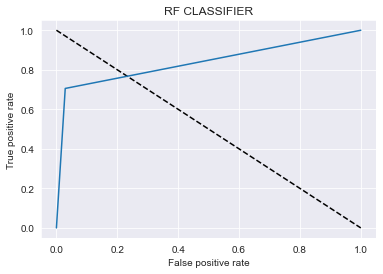

In [80]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
rf.fit(x_train_new,y_train_new)
y_pred_test=rf.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RF Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RF CLASSIFIER')
plt.show()

### ExtraTreesClassifier Model:

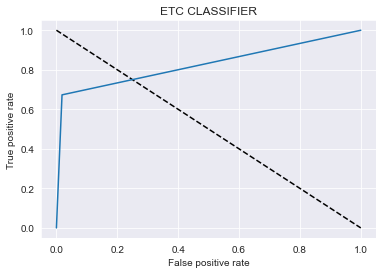

In [81]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
etc.fit(x_train_new,y_train_new)
y_pred_test=etc.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
roc_auc=auc(fpr,tpr)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'ExtraTrees Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ETC CLASSIFIER')
plt.show()

### As we can see that `Random Forest` accupy the more area under the curve. So we will select this as the Best fit model.

## `Hyper-Parameter Tunning:-`

### Random Forest:-

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV ,RandomizedSearchCV

In [90]:
 ##Lets select the different parameters for tuning our best model (RandomForestClassifier)
grid_params = {'n_estimators':[100,200],
               'criterion':['gini','entropy'],
               'bootstrap':[True,False]}

# Train the model with given parameters using GridSearchCV
GSCV =  RandomizedSearchCV(RandomForestClassifier(), grid_params, cv=5, verbose=3,n_jobs=-1)
GSCV.fit(x_train_new, y_train_new)

In [91]:
print(GSCV.best_params_)

In [92]:
### Model Evaluation
rf=RandomForestClassifier(n_estimators=200,criterion="gini",bootstrap=False)
rf.fit(x_train_new,y_train_new)
prediction=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,prediction))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, prediction)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, prediction)}")






***********************Testing Scores******************************

Accuracy score for testing is :  0.9469949274991033

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     35050
           1       0.77      0.68      0.72      3984

    accuracy                           0.95     39034
   macro avg       0.87      0.83      0.85     39034
weighted avg       0.94      0.95      0.95     39034


CONFUSION MATRIX: 
 [[34244   806]
 [ 1263  2721]]


In [93]:
import scikitplot as sktplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

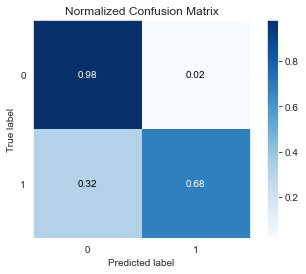

In [94]:
## Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, prediction, normalize=True)

## ROC AUC Curve:

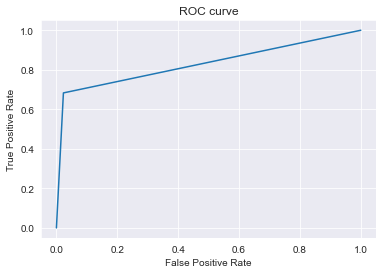

AUC value is 0.829993103655707 


In [95]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_test,prediction)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## Saving the Model:

In [96]:
import joblib
joblib.dump(rf,'Malignant_comment_classification_model')

['Malignant_comment_classification_model']

## `Acutal Vs Prediction:`

In [97]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
new_df=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
new_df

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
39029,1,0
39030,0,0
39031,0,0
39032,0,0


In [98]:
## saving it in the local:

new_df.to_csv(r"E:\Ratings\Actual VS Predicted.csv")

## `Prediction of Testing DataSet`

In [99]:
test_df.head(10)

,comment_text
0,bitch ja rule succes youll ever what hate sad mofuckasi bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit hi amand nothin wrong bein like tupac brother toofuckin white boy get thing right next time
1,rfc titl fine imo
2,sourc zaw ashton lapland
3,look back sourc inform updat correct form guess sourc hadnt updat shall updat inform thank messag
4,dont anonym edit articl
5,thank understand think high would revert without discuss
6,pleas add nonsens wikipedia edit consid vandal quick undon would like experi pleas use sandbox instead thank
7,dear god site horribl
8,fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclopædia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough dont know know shameless lucki number throw air gc
9,doubl redirect fix doubl redirect dont blank outer one need edit point final target unless think inappropri case need nomin wprfd


In [100]:
## Vectorization:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vector = TfidfVectorizer(max_features = 3000, stop_words='english')
X = tf_vector.fit_transform(test_df['comment_text'])
X.shape

(153164, 3000)

In [101]:
test_prediction=rf.predict(X)

In [102]:
## Adding prediction into the dataframe:-
test_df['Predicted_output']=test_prediction
test_df.head(10)



,comment_text,Predicted_output
0,bitch ja rule succes youll ever what hate sad mofuckasi bitch slap ur pethed white face get kiss ass guy sicken ja rule pride da music man dont diss shit hi amand nothin wrong bein like tupac brother toofuckin white boy get thing right next time,0
1,rfc titl fine imo,0
2,sourc zaw ashton lapland,0
3,look back sourc inform updat correct form guess sourc hadnt updat shall updat inform thank messag,0
4,dont anonym edit articl,0
5,thank understand think high would revert without discuss,0
6,pleas add nonsens wikipedia edit consid vandal quick undon would like experi pleas use sandbox instead thank,0
7,dear god site horribl,0
8,fool believ number correct number lie ponder number care error persist long time continu reproduc latest reproduct know encyclopædia britannica almanac wich state magnittud fair enough victim today lot guess peopl come number impress enough dont know know shameless lucki number throw air gc,0
9,doubl redirect fix doubl redirect dont blank outer one need edit point final target unless think inappropri case need nomin wprfd,0


In [103]:
## Saving in the local:-
test_df.to_csv(r"E:\Ratings\Testing_dataset_prediction.csv")

## Problems faced while working in this project:
- More computational power was required as it took more than 3 hours
- Imbalanced dataset and bad comment texts
- Good parameters could not be obtained using hyperparameter tuning as time was consumed more